In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import decomposition
from sklearn import datasets

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

filename = 'freshest_hops.csv' # designate filename
rawdf = pd.read_table(filename, error_bad_lines=False, delimiter = ',') #read in file
print(rawdf)

        time    mq2    mq3    mq4    mq5    mq7  day  hop  alpha  beta
0     1155.2  0.900  1.630  0.625  0.350  1.135    4    1   12.3   3.6
1     1156.0  0.900  1.635  0.620  0.355  1.135    4    1   12.3   3.6
2     1156.8  0.900  1.640  0.620  0.355  1.135    4    1   12.3   3.6
3     1157.6  0.900  1.640  0.625  0.345  1.135    4    1   12.3   3.6
4     1158.4  0.905  1.630  0.615  0.340  1.135    4    1   12.3   3.6
5     1159.2  0.900  1.630  0.615  0.335  1.135    4    1   12.3   3.6
6     1160.0  0.905  1.635  0.625  0.340  1.135    4    1   12.3   3.6
7     1160.8  0.905  1.640  0.625  0.345  1.135    4    1   12.3   3.6
8     1161.6  0.905  1.635  0.620  0.340  1.135    4    1   12.3   3.6
9     1162.4  0.910  1.640  0.625  0.345  1.135    4    1   12.3   3.6
10    1163.3  0.905  1.635  0.625  0.345  1.135    4    1   12.3   3.6
11    1164.1  0.910  1.630  0.610  0.345  1.130    4    1   12.3   3.6
12    1164.9  0.910  1.635  0.625  0.345  1.125    4    1   12.3   3.6
13    

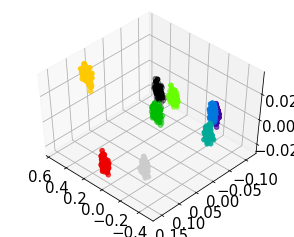

[  9.30481379e-01   6.74831088e-02   1.32155806e-03   7.13953680e-04]
[[ 0.50878707  0.42015573  0.25479245  0.70688449]
 [ 0.44033652  0.28465627  0.52064904 -0.67379457]
 [-0.73577904  0.53150307  0.41474677  0.06417803]
 [-0.0766073  -0.67819205  0.70142035  0.20541753]]


In [78]:
np.random.seed(5)

labels = np.array(rawdf['hop']) #set classes as labels

df = rawdf.filter(['mq2', 'mq4', 'mq5', 'mq7'], axis=1)
sensordata = df.values #matrix of sensor data

beers = [1,2,3,4,5,6,7,8,9]
#beers = ['citra', 'cascade', 'centennial', 'simcoe', 'columbus', 'amarillo',
#        'liberty', 'magnum', 'willamette']
#labels = np.arange(len(beers))

X = sensordata
y = labels

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

for i in range(len(beers)):
        '''ax.text3D(X[y == labels[i], 0].mean(),
              X[y == labels[i], 1].mean() + 1.5,
              X[y == labels[i], 2].mean(), beers[i],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))'''
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)#, edgecolor='k')

plt.show()

print(pca.explained_variance_ratio_)  

print(pca.components_)

In [68]:
classes_reshaped = np.reshape(y,(len(X),1))

inputs_and_classes = np.concatenate((X, classes_reshaped), axis=1)
print(inputs_and_classes)

[[  3.84996891e-01  -1.01071318e-01  -5.97134630e-03   1.00000000e+00]
 [  3.84170075e-01  -9.98913542e-02  -6.55512782e-03   1.00000000e+00]
 [  3.84170075e-01  -9.98913542e-02  -6.55512782e-03   1.00000000e+00]
 ..., 
 [ -2.56843682e-01   1.24291658e-01  -9.52802176e-03   9.00000000e+00]
 [ -2.58277326e-01   1.29083912e-01  -7.19139658e-03   9.00000000e+00]
 [ -2.48824227e-01   1.31943148e-01  -5.81815243e-03   9.00000000e+00]]


In [38]:
len(beers)

9

In [28]:
y = np.reshape(y,(150,1))

In [13]:
X

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

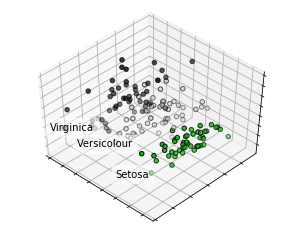

In [11]:
#original example

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [61]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
X = sensordata
y = labels

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2),
                   ('djjf',4), ('dkf',5), ('dllf',6), ('d;f',7), ('d;;hf',8), ('dfff',9) ]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.


ValueError: invalid entry in choice array